In [3]:
import sys
import os
import numpy as np
import ema_workbench.analysis.pairs_plotting as pairs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
sys.path.append('..')
import rbf_functions

D:\Applications\Anaconda3\envs\py38\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


In [4]:
rbfs = [rbf_functions.original_rbf,
        rbf_functions.squared_exponential_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

In [5]:
# pareto_sets = {}
# for entry in rbfs:
#     name = entry.__name__
#     output_dir = f"../refsets/"
#     results = pd.read_csv(output_dir + name+ '_refset.csv')
#     pareto_sets[name] = results

refset = {}
varset = {}
for entry in rbfs:
    name = entry.__name__
    # load variables
    output_dir = os.path.abspath('../notebooks/refsets/')
    for filename in os.listdir(output_dir):
        if filename == f'{name}_refset.csv':
            df_refs = pd.read_csv(f"{output_dir}\{filename}")
            refset[name] = df_refs
        elif filename == f'{name}_refset_variables.csv':
            df_vars = pd.read_csv(f"{output_dir}\{filename}",header=None)
            columnname = ["c1","r1","c2","r2","c3","r3","c4","r4","c5","r5","c6","r6","c7","r7","c8","r8","w1","w2","w3","w4","w5","w6","w7","w8","w9","w10","w11","w12","w13","w14","w15","w16"]
            df_vars.columns = columnname
            varset[name] = df_vars
varset.keys()

dict_keys(['original_rbf', 'squared_exponential_rbf', 'inverse_quadratic_rbf', 'inverse_multiquadric_rbf', 'exponential_rbf', 'matern32_rbf', 'matern52_rbf'])

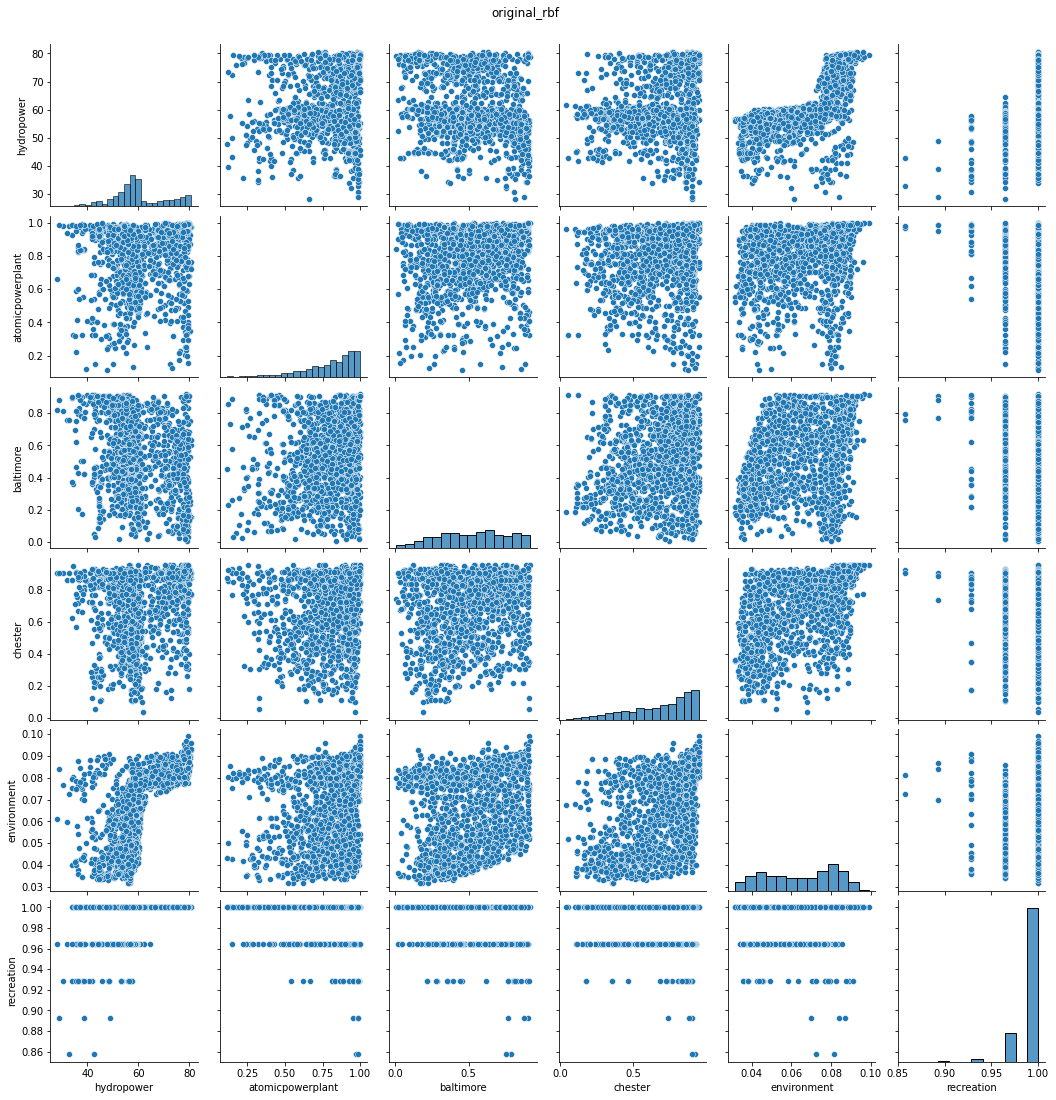

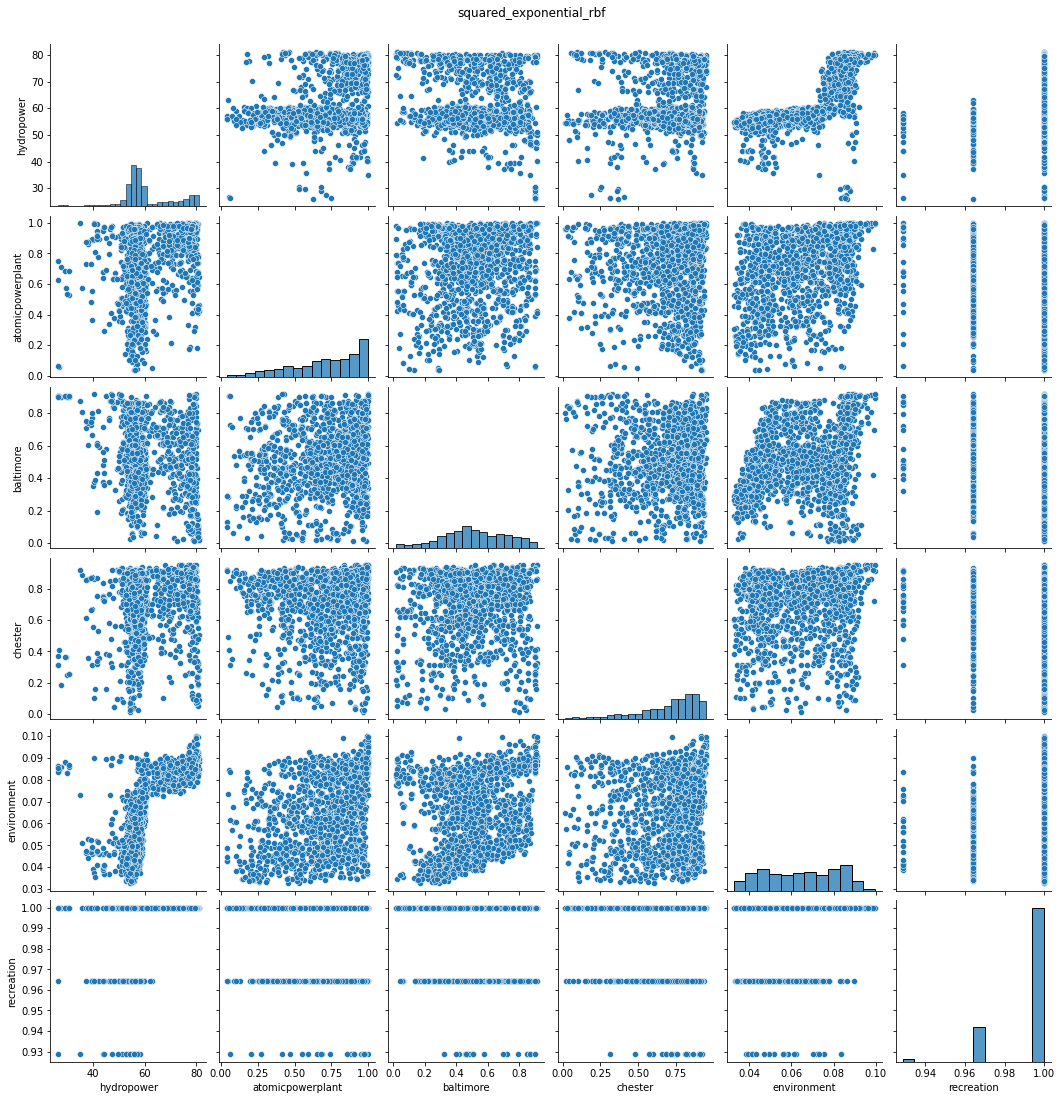

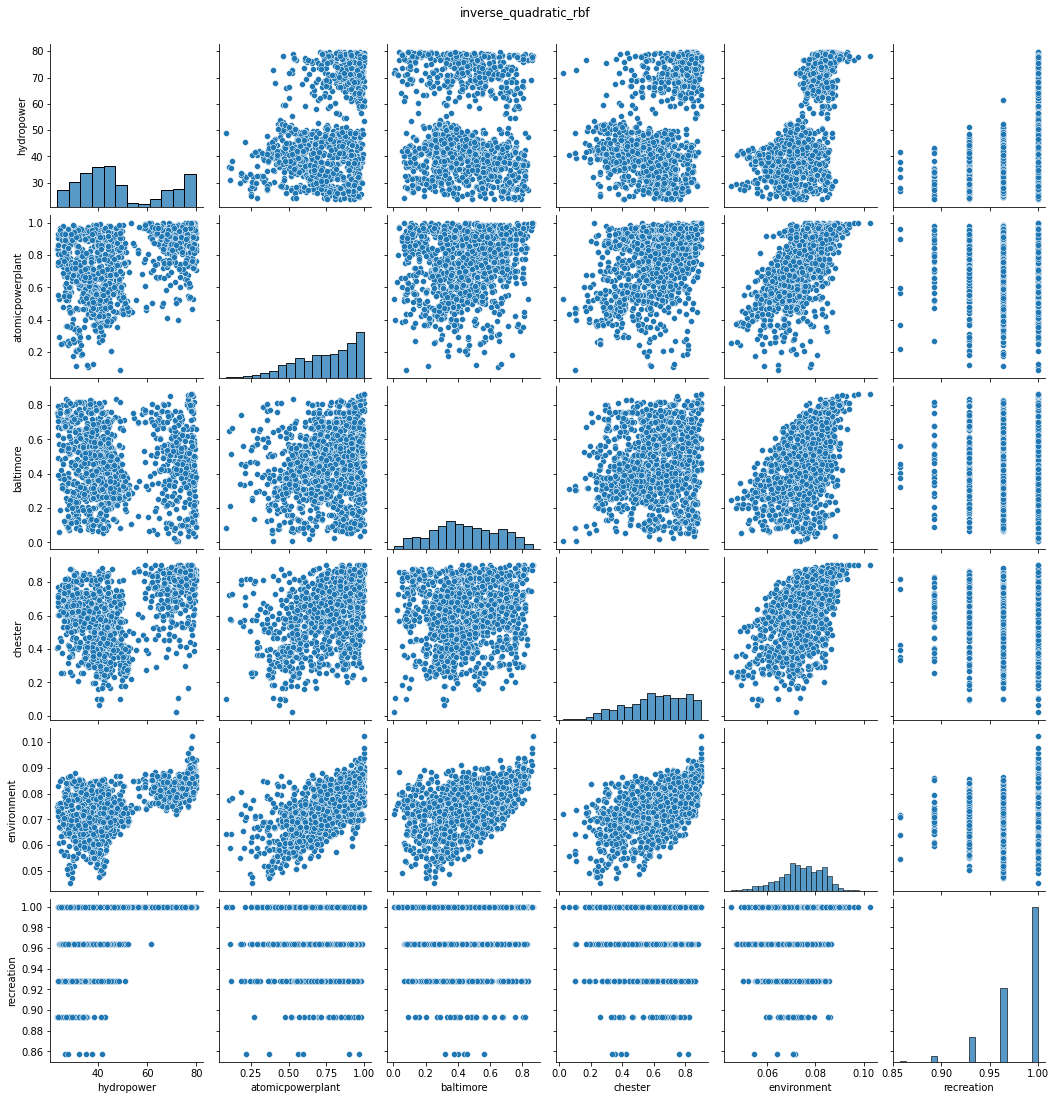

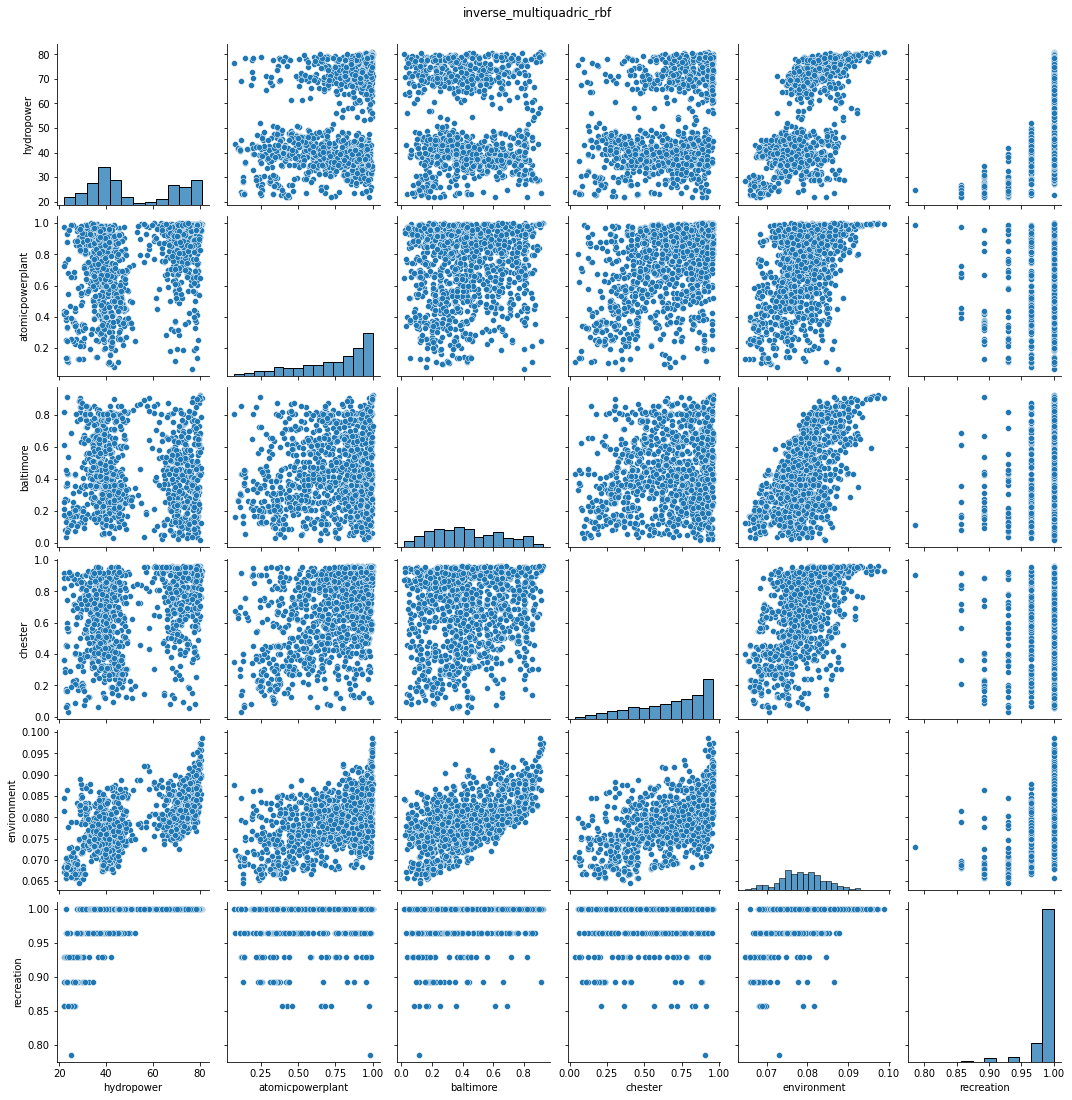

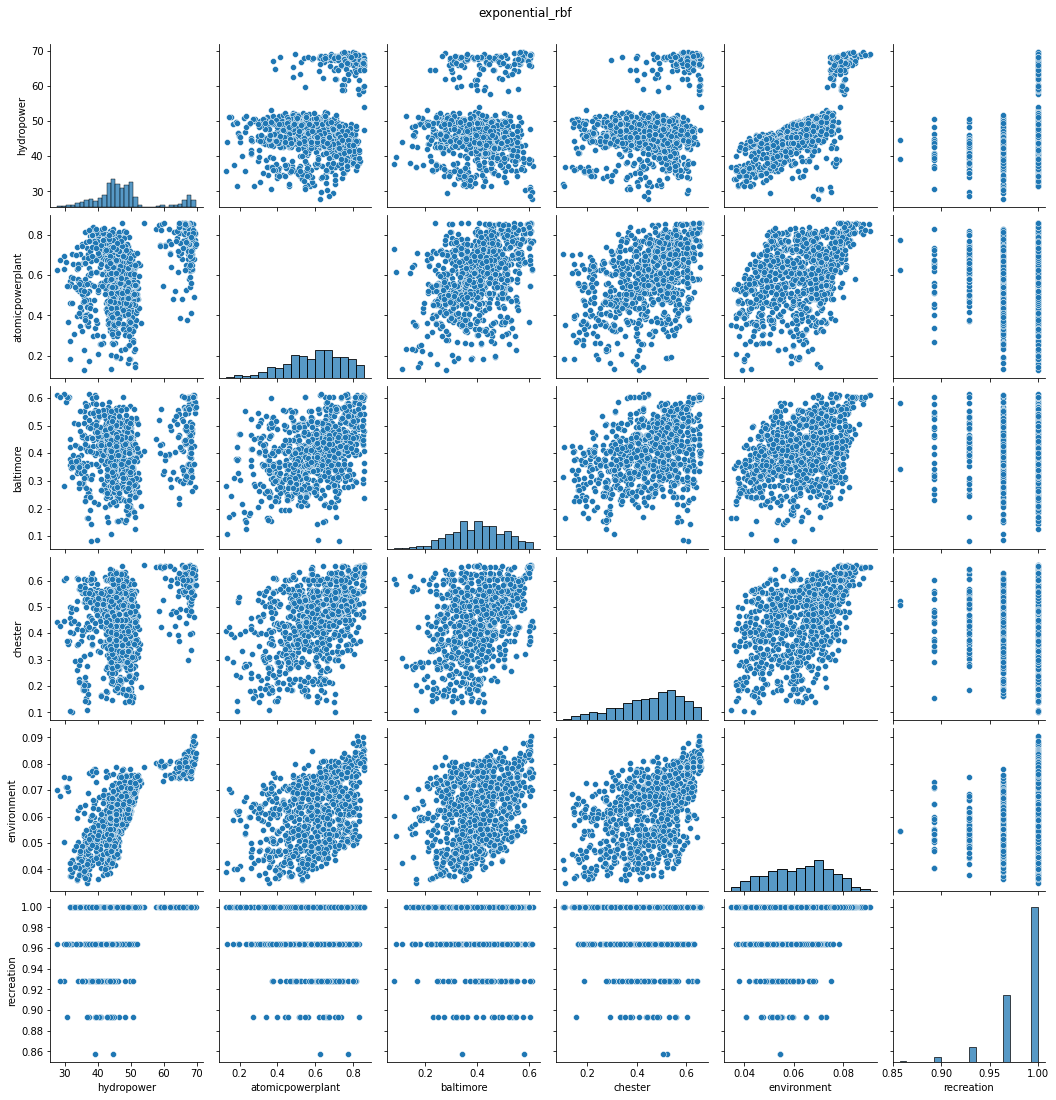

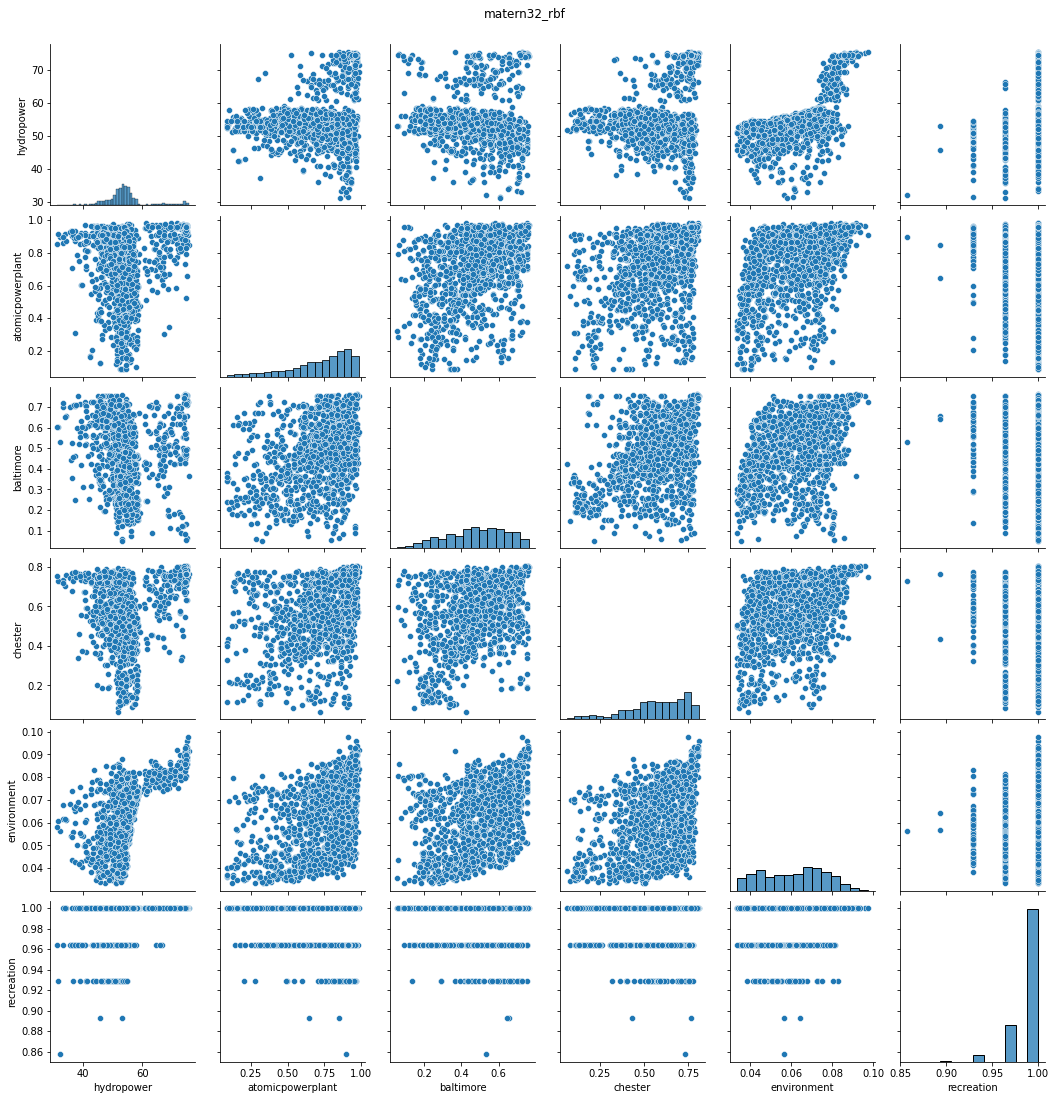

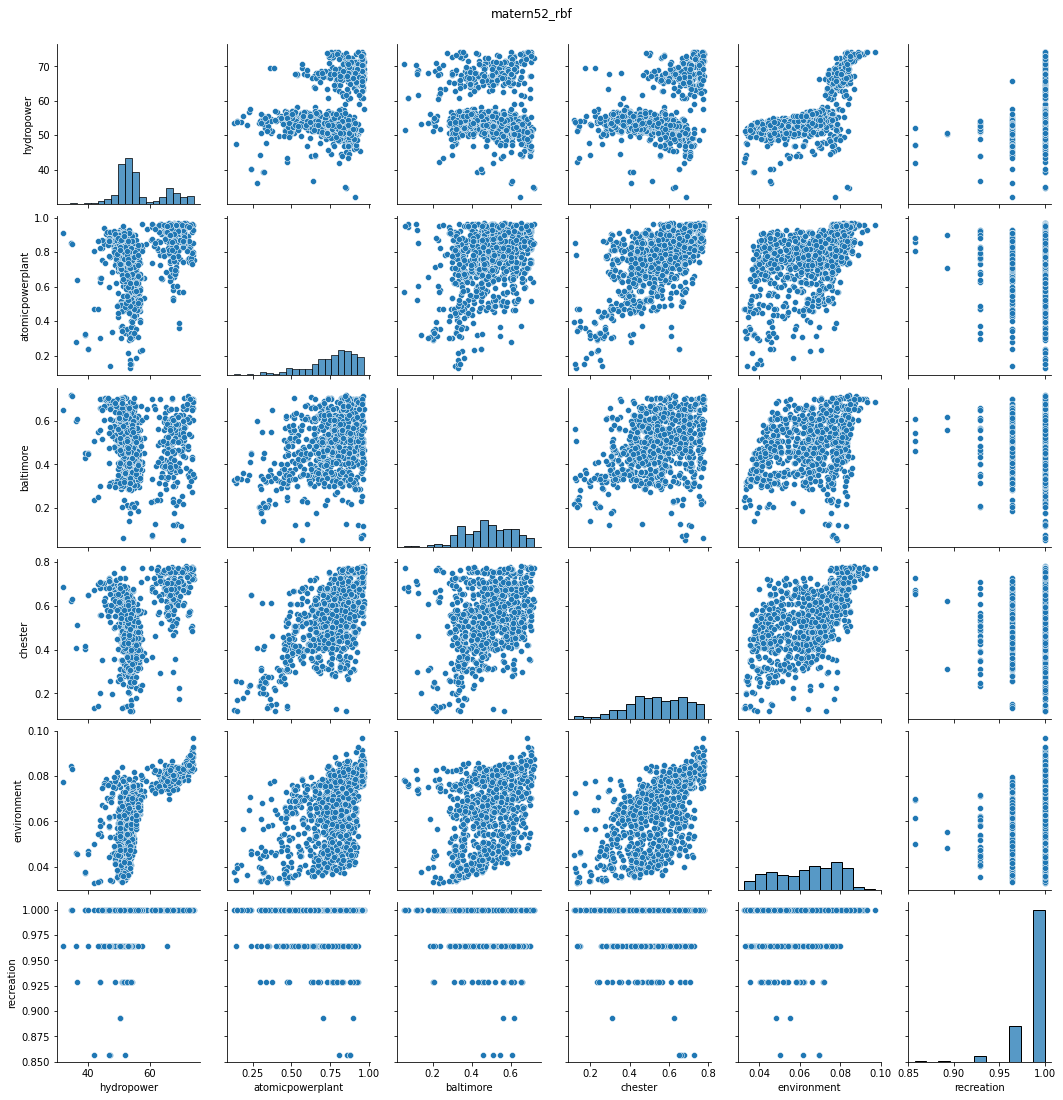

In [52]:
# np.asarray(varset['original_rbf'])[0]
# refset['original_rbf'].to_dict()
for i in refset:
    g = sns.pairplot(refset[i])
    g.fig.suptitle(i, y=1.02)
    plt.show()

In [28]:
for k, v in refset.items():
    v['rbf'] = k

combined = pd.concat(refset.values())
combined.reset_index(inplace=True, drop=True)

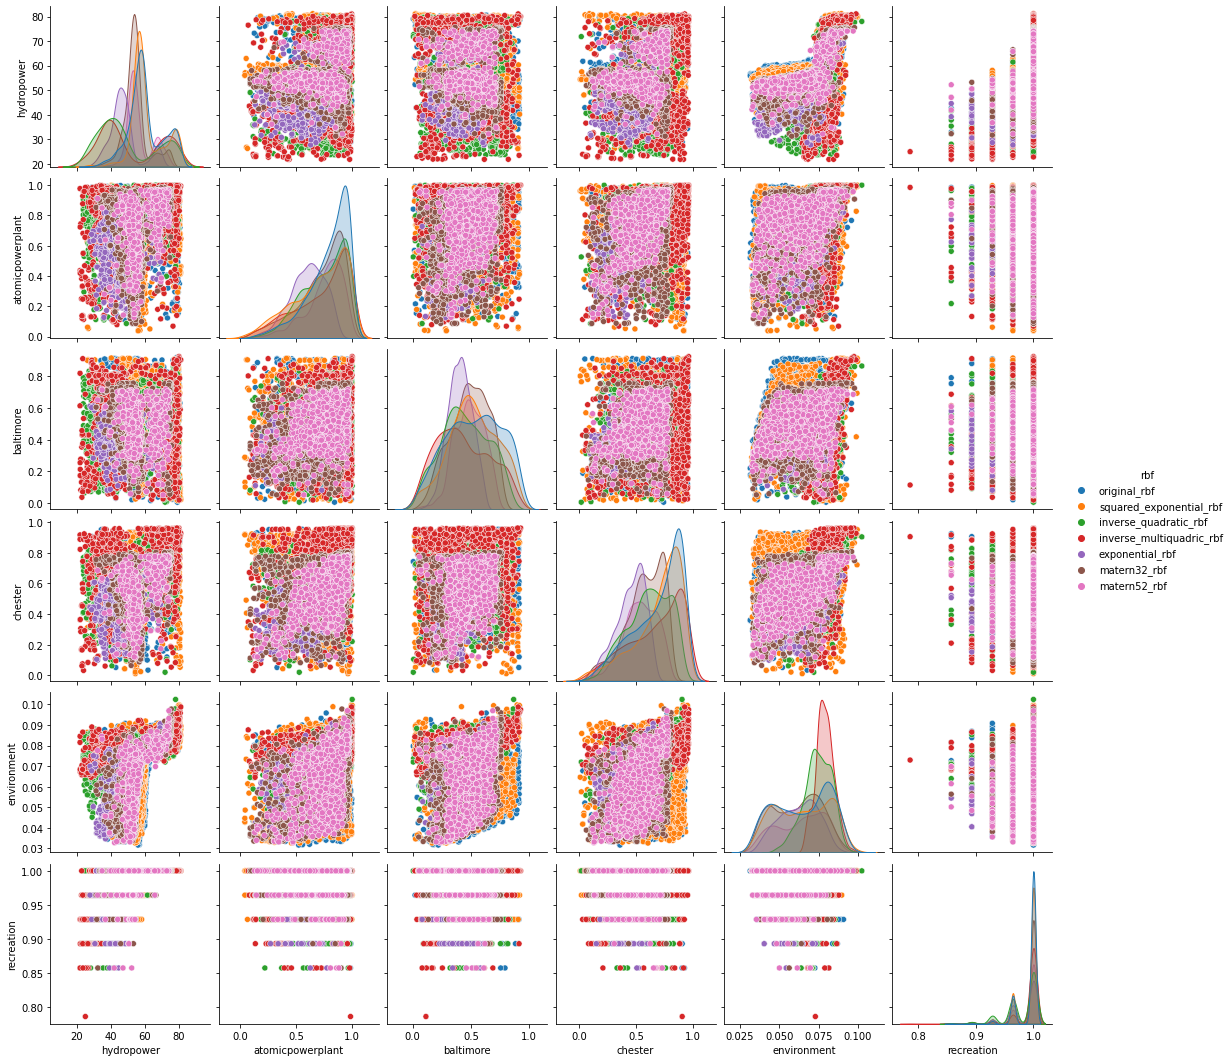

In [37]:
p = sns.pairplot(combined, hue="rbf")